# Optimization


<img src="https://www.mrtfuelcell.polimi.it/images/logo_poli.jpg" height="200">

**Basi Fondamentali del Machine Learning**

Day 9 - 2024-11-28

Michael Wood, Maciej Sakwa, Emanuele Ogliari

![european starling murmuration](./images/murmuration.gif)

_Particle swarm optimization is inspired by flocks of birds (here, European Starlings)_

## Outline

1. Basics of Optimization
2. Some Types of Optimization
3. **Example**: Travelling Salesman Problem
4. **Example**: Vehicle Routing Problem
5. **Application**: Vehicle-to-Grid Dispatch


## Learning Objectives
- Understand basic mathematical optimization principles
- See a few different optimization methods
- Follow the basics of genetic algorithms
- Follow the code for Linear Programming in a Vehicle-to-Grid battery dispatch example

---

# Basics of Optimization

![minimization of x2](./images/min_x2.png)

_Quadratic function minimization - it's easy!_

![ackley function](./images/differential_evolution.gif)

_Ackley Function minimization - it's difficult!_

Mathematical Optimization
- Process of finding the input to a function that has the absolute lowest output of the function, where the input is subject to some constraints

Objective Function
- What we are trying to minimize
  - e.g. `y=x²`
- For real world problems we dont know the "shape" of the objective function (not a simple curve)
  - e.g. Ackley Function above

Minimization vs maximization
- Usually one is just the opposite of the other
  - e.g. `min(y=x²)` is also `max(y=-x²)`

Local vs Global minimum

- Most functions have at least one "global" minimum value
  - e.g. `min(y=x²)=0`
- Others may have multiple "local" minimum values that can be confused with the global one
  - e.g. Ackley Function above 

Constraints
- Often the input values are limited (not infinite)
  - e.g. `x > 1`

![minimization of x2](./images/min_x2_st_xgt1.png)

- The constraint can also be a function
  - e.g. `y > x+2`

![minimization of x2](./images/min_x2_st_x+2.png)

Single vs multi objective
- All these examples have one function to minimize "`y`"
- We could have both `y` and `z`, or "multi objectives"
- A relatively simple approach is "Pareto analysis" (not covered here)

![pareto front](./images/pareto.png)

---

# Some Types of Optimization

- Wont cover all (too many)
- These are common and powerful

## Least Squares (review)

![interactive-regression](https://github.com/woodjmichael/Basi-Fondamentali-del-Machine-Learning/blob/main/images/interactive-regression.png?raw=true)

- Data are yellow dots
- The red line is the **best fit**
  - Each red square is the _square of the error_ for each dot
- The blue line is **not fit**
  - Each blue square is the _square of the error_ for each dot








## Bayes Theorem (review)

- Fundamental and powerful theorem in statistics
- Main idea: we usually have "prior" knowledge about something before predicting/estimating
- Goal is to *update* our belief with new information, not *replace* it


Simple example
- **Prior:** at the beach in Sardegna in August
- **Likelihood:** phone weather app says snow tomorrow
- **Posterior:** multiplication (union) of prior and likelihood
- **Bayes says:** probably *not* going to snow tomorrow

Bayes Theorem

$$
Posterior = \frac{Likelihood\ \times Prior}{Evidence}
$$

### Autonomous Driving Example


<img src="https://github.com/woodjmichael/Basi-Fondamentali-del-Machine-Learning/blob/main/images/kalman.png?raw=True" width="500" height="auto">


Simplified math: $X_t^{opt} = X_t^{pred} Y_t$


- All letters are probability distributions

- Multiplying two probability distributions together is like finding the "union" of the two

- $X_t^{pred}$ is next estimated car position

- $Y$ is measured car position

- $X_t^{opt}$ is optimal estimate of current car position



Shortcut: product of two normal PDFs with only
- mean $\mu$, and
- standard deviation $\sigma$

$$
\mu_{opt} = {\mu_X \sigma_Y^2 + \mu_Y \sigma_X^2 \over \sigma_X^2 + \sigma_Y^2}, \ \ \ \  \sigma_{opt} =  {\sigma_X^2 \sigma_Y^2 \over \sigma_X^2 + \sigma_Y^2} \\
$$

## Linear Programming

- We say linear because the method is based on linear algebra
  - Essentially: matrix multiplication, additon, and other tools
- We usually call the objective function `f` 
- Two types of constraints:
  - Equality (solution must be exactly equal to constaint)
  - Inequality (solution must be > or < than)
- Also we "bound" (restrict) the input values 
- `x` is our "decision variable", when we charge or discharge the battey and how much:
  - e.g. `x(0) = 100kW` at `0:00`, `x(1) = -200kW` at `1:00`, etc..
  - where positive values are charging and negative discharging

$$

min(f(x)=c^Tx) \\

subject\ to: \\

A_{ineq} x \le b_{ineq} \\

A_{eq} x = b_{eq} \\

where: \\

bnd[0,:] \le x \le bnd[1,:]

$$

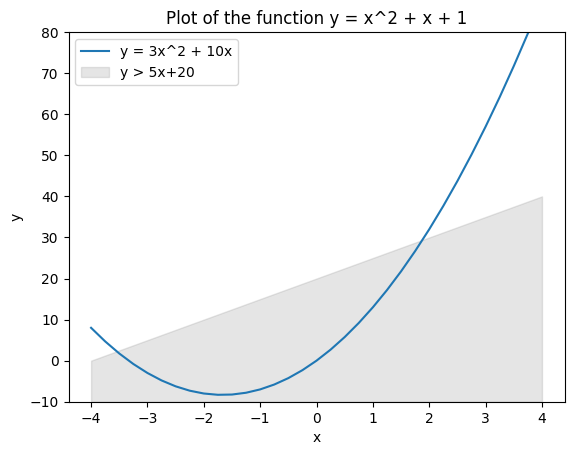

In [1]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy import linspace

# Define the quadratic function
def f(x,a,b,c):
    return a * x**2 + b * x + c

def fcon(x,a,b):
    return a * x + b

# Generate Data Points
x = linspace(-4, 4, 33)  # Generate 400 points between -10 and 10
y = f(x,a=3,b=10,c=0)  # Compute the corresponding y values using the quadratic function

# Generate Data Points
#x_values = np.linspace(-10, 10, 400)  # Generate 400 points between -10 and 10
#y_values = quadratic_function(x_values)  # Compute the corresponding y values using the quadratic function

# Plot the Function
#plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(x, y, label='y = 3x^2 + 10x')  # Plot the function
plt.fill_between(x, fcon(x,5,20), -10, color='gray', alpha=0.2,label='y > 5x+20')

plt.title('Plot of the function y = x^2 + x + 1')  # Set the title of the plot
plt.xlabel('x')  # Set the x-axis label
plt.ylabel('y')  # Set the y-axis label
plt.legend()  # Display the legend
plt.ylim((-10,80))
#plt.grid(True)  # Enable the grid
plt.show()  # Show the plot

In [2]:
import numpy as np
from scipy.optimize import linprog

obj = -1*np.array([2,5,4.5,3])

A_ineq = [[1, 1.2, 0, 5],
          [2, 1.4, 0.9, 0],
          [1, 0, 1.5, 3],
          [0, -1, -5, 2]]

b_ineq = [8, 3, 6, -4]

A_eq = [[-1, 8.2, 7.5, -15]]

b_eq = [16]

bnd = [(0, float('inf')),
       (0, float('inf')),
       (0, float('inf')),
       (0, float('inf')),]

linprog(c=obj, A_ub=A_ineq, b_ub=b_ineq,
               A_eq=A_eq, b_eq=b_eq,
               bounds=bnd,
               method="revised simplex")

C:\Users\Admin\AppData\Local\Temp\ipykernel_9352\2314723839.py:22: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  linprog(c=obj, A_ub=A_ineq, b_ub=b_ineq,


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -16.088105726872246
       x: [ 0.000e+00  2.643e-01  2.922e+00  5.389e-01]
     nit: 4

$$

\begin{aligned}
    &\text{Maximize} \quad f(\mathbf{x}) = 2x_1 + 5x_2 + 4.5x_3 + 3x_4, \\
    &\text{subject to:} \\
    &\quad x_1 + 1.2x_2 + 5x_4 \leq 8, \\
    &\quad 2x_1 + 1.4x_2 + 0.9x_3 \leq 3, \\
    &\quad x_1 + 1.5x_3 + 3x_4 \leq 6, \\
    &\quad x_2 + 5x_3 - 2x_4 \geq 4, \\
    &\quad -x_1 + 8.2x_2 + 7.5x_3 - 15x_4 = 16, \\
    &\quad x_i \geq 0, \quad i = 1, \dots, 4.
\end{aligned}

$$

$$

min(f(x)=c^Tx) \\

subject\ to: \\

A_{ineq} x \le b_{ineq} \\

A_{eq} x = b_{eq} \\

where: \\

bnd[0,:] \le x \le bnd[1,:] \\


Example:\\

f(x) = 2x_1 + 5x_2 + 4.5x_3 + 3x_4 \\



$$


In [3]:
import numpy as np
from scipy.optimize import linprog

obj = -1*np.array([2,5,4.5,3])

A_ineq = [[1, 1.2, 0, 5],
          [2, 1.4, 0.9, 0],
          [1, 0, 1.5, 3],
          [0, -1, -5, 2]]

b_ineq = [8, 3, 6, -4]

A_eq = [[-1, 8.2, 7.5, -15]]

b_eq = [16]

bnd = [(0, float('inf')),
       (0, float('inf')),
       (0, float('inf')),
       (0, float('inf')),]

linprog(c=obj, A_ub=A_ineq, b_ub=b_ineq,
               A_eq=A_eq, b_eq=b_eq,
               bounds=bnd,
               method="revised simplex")

C:\Users\Admin\AppData\Local\Temp\ipykernel_9352\2314723839.py:22: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  linprog(c=obj, A_ub=A_ineq, b_ub=b_ineq,


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -16.088105726872246
       x: [ 0.000e+00  2.643e-01  2.922e+00  5.389e-01]
     nit: 4

## Genetic and Evolutionary Algorithms

<img src="./images/wing.jpg" width="500" height="auto">

- Results can be surprising, even hard to believe

In [4]:
# genetic algorithm search for continuous function optimization
import numpy as np
from numpy.random import randint
from numpy.random import rand

# objective function
def objective(x):
	return x[0]**2.0 + x[1]**2.0 + 10

# decode bitstring to numbers
def decode(bounds, n_bits, bitstring):
	decoded = list()
	largest = 2**n_bits
	for i in range(len(bounds)):
		# extract the substring
		start, end = i * n_bits, (i * n_bits)+n_bits
		substring = bitstring[start:end]
		# convert bitstring to a string of chars
		chars = ''.join([str(s) for s in substring])
		# convert string to integer
		integer = int(chars, 2)
		# scale integer to desired range
		value = bounds[i][0] + (integer/largest) * (bounds[i][1] - bounds[i][0])
		# store
		decoded.append(value)
	return decoded

# tournament selection
def selection(pop, scores, k=3):
	# first random selection
	selection_ix = randint(len(pop))
	for ix in randint(0, len(pop), k-1):
		# check if better (e.g. perform a tournament)
		if scores[ix] < scores[selection_ix]:
			selection_ix = ix
	return pop[selection_ix]

# crossover two parents to create two children
def crossover(p1, p2, r_cross):
	# children are copies of parents by default
	c1, c2 = p1.copy(), p2.copy()
	# check for recombination
	if rand() < r_cross:
		# select crossover point that is not on the end of the string
		pt = randint(1, len(p1)-2)
		# perform crossover
		c1 = p1[:pt] + p2[pt:]
		c2 = p2[:pt] + p1[pt:]
	return [c1, c2]

# mutation operator
def mutation(bitstring, r_mut):
	for i in range(len(bitstring)):
		# check for a mutation
		if rand() < r_mut:
			# flip the bit
			bitstring[i] = 1 - bitstring[i]

# genetic algorithm
def genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut):
	# initial population of random bitstring
	pop = [randint(0, 2, n_bits*len(bounds)).tolist() for _ in range(n_pop)]
	# keep track of best solution
	best, best_eval = 0, objective(decode(bounds, n_bits, pop[0]))
	# enumerate generations
	for gen in range(n_iter):
		# decode population
		decoded = [decode(bounds, n_bits, p) for p in pop]
		# evaluate all candidates in the population
		scores = [objective(d) for d in decoded]
		# check for new best solution
		for i in range(n_pop):
			if scores[i] < best_eval:
				best, best_eval = pop[i], scores[i]
				print(">%d, new best f(%s) = %f" % (gen,  decoded[i], scores[i]))
		# select parents
		selected = [selection(pop, scores) for _ in range(n_pop)]
		# create the next generation
		children = list()
		for i in range(0, n_pop, 2):
			# get selected parents in pairs
			p1, p2 = selected[i], selected[i+1]
			# crossover and mutation
			for c in crossover(p1, p2, r_cross):
				# mutation
				mutation(c, r_mut)
				# store for next generation
				children.append(c)
		# replace population
		pop = children
	return [best, best_eval]

# define range for input
bounds = [[-5.0, 5.0],
          [-5.0, 5.0],]

n_iter = 100 # define the total iterations
n_bits = 16 # bits per variable
n_pop = 100 # define the population size
r_cross = 0.9 # crossover rate
r_mut = 1.0 / (float(n_bits) * len(bounds)) # mutation rate

# perform the genetic algorithm search
best, score = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

>0, new best f([-0.893707275390625, -2.020111083984375]) = 14.879561
>0, new best f([0.9088134765625, -0.247039794921875]) = 10.886971
>0, new best f([-0.45623779296875, 0.569305419921875]) = 10.532262
>0, new best f([0.55877685546875, -0.207977294921875]) = 10.355486
>1, new best f([-0.45623779296875, -0.247039794921875]) = 10.269182
>2, new best f([-0.074310302734375, 0.340118408203125]) = 10.121203
>3, new best f([0.16876220703125, 0.124053955078125]) = 10.043870
>3, new best f([0.0, 0.1885986328125]) = 10.035569
>4, new best f([-0.069732666015625, 0.04119873046875]) = 10.006560
>8, new best f([0.004119873046875, 0.04302978515625]) = 10.001869
>9, new best f([0.002899169921875, 0.003814697265625]) = 10.000023
>12, new best f([0.0, 0.00457763671875]) = 10.000021
>14, new best f([0.000457763671875, 0.000762939453125]) = 10.000001
>23, new best f([0.000152587890625, 0.000762939453125]) = 10.000001
>26, new best f([0.00030517578125, 0.0]) = 10.000000
>26, new best f([0.0, 0.000152587890

---

# Example: Travelling Salesman Problem

- Visit every city once and return to the first city
- "NP Hard" means true global minimum is only found by checking _every possibile solution_

<img src="./images/travelling_salesman.gif" width="500" height="auto">


Try the interactive [web app](https://toddwschneider.com/posts/traveling-salesman-with-simulated-annealing-r-and-shiny/#salesman-app) by Todd Schneider
- Solved here with "simulated annealing"

---

# Example: Vehicle Routing Problem

- Similar to Travelling Salesman Problem
- Deliver packages from circles to square
- Vehicle has limited space, may need to return early to square
- Here, solved with Linear Programming

<img src="./images/vehicle_routing_problem.gif" width="500" height="auto">

_From [Jumanji](https://instadeepai.github.io/jumanji/environments/cvrp/)_

<image href="./images/travelling_salesman.gif"></image>

---

# Application: Vehicle-to-Grid Dispatch

[Battery Optimisation (Greyson Chung)](https://github.com/greysonchung/Battery-Optimisation/tree/main)

Below is the most important code for the optimization:

In [5]:
import pandas as pd
import numpy as np

import logging
logging.getLogger('pyomo.core').setLevel(logging.ERROR)

from pyomo.environ import *
from pyutilib.services import register_executable, registered_executable
register_executable(name='glpsol')

def battery_optimisation(datetime, spot_price, initial_capacity=0, include_revenue=True, solver: str='glpk'):
    """
    Determine the optimal charge and discharge behavior of a battery based 
    in Victoria. Assuming pure foresight of future spot prices over every 
    half-hour period to maximise the revenue.
    PS: Assuming no degradation to the battery over the timeline and battery cannot
        charge and discharge concurrently.
    ----------
    Parameters
    ----------
    datetime        : a list of time stamp
    spot_price      : a list of spot price of the corresponding time stamp
    initial_capacit : the initial capacity of the battery
    include_revenue : a boolean indicates if return results should include revenue calculation
    solver          : the name of the desire linear programming solver (eg. 'glpk', 'mosek', 'gurobi')

    Returns
    ----------
    A dataframe that contains battery's opening capacity for each half-hour period, spot price
    of each half-hour period and battery's raw power for each half-hour priod
    """
    # Battery's technical specification
    MIN_BATTERY_CAPACITY = 0
    MAX_BATTERY_CAPACITY = 580
    MAX_BATTERY_POWER = 150
    MAX_RAW_POWER = 300
    INITIAL_CAPACITY = initial_capacity # Default initial capacity will assume to be 0
    EFFICIENCY = 0.9
    MLF = 0.991 # Marginal Loss Factor
    
    df = pd.DataFrame({'datetime': datetime, 'spot_price': spot_price}).reset_index(drop=True)
    df['period'] = df.index
    initial_period = 0
    final_period = df.index[-1]
    
    # Define model and solver
    battery = ConcreteModel()
    opt = SolverFactory(solver)

    # defining components of the objective model
    # battery parameters
    battery.Period = Set(initialize=list(df.period), ordered=True)
    battery.Price = Param(initialize=list(df.spot_price), within=Any)

    # battery varaibles
    battery.Capacity = Var(battery.Period, bounds=(MIN_BATTERY_CAPACITY, MAX_BATTERY_CAPACITY))
    battery.Charge_power = Var(battery.Period, bounds=(0, MAX_RAW_POWER))
    battery.Discharge_power = Var(battery.Period, bounds=(0, MAX_RAW_POWER))

    # Set constraints for the battery
    # Defining the battery objective (function to be maximise)
    def maximise_profit(battery):
        rev = sum(df.spot_price[i] * (battery.Discharge_power[i] / 2 * EFFICIENCY) * MLF for i in battery.Period)
        cost = sum(df.spot_price[i] * (battery.Charge_power[i] / 2) / MLF for i in battery.Period)
        return rev - cost

    # Make sure the battery does not charge above the limit
    def over_charge(battery, i):
        return battery.Charge_power[i] <= (MAX_BATTERY_CAPACITY - battery.Capacity[i]) * 2 / EFFICIENCY

    # Make sure the battery discharge the amount it actually has
    def over_discharge(battery, i):
        return battery.Discharge_power[i] <= battery.Capacity[i] * 2

    # Make sure the battery do not discharge when price are not positive
    def negative_discharge(battery, i):
        # if the spot price is not positive, suppress discharge
        if battery.Price.extract_values_sparse()[None][i] <= 0:
            return battery.Discharge_power[i] == 0

        # otherwise skip the current constraint    
        return Constraint.Skip

    # Defining capacity rule for the battery
    def capacity_constraint(battery, i):
        # Assigning battery's starting capacity at the beginning
        if i == battery.Period.first():
            return battery.Capacity[i] == INITIAL_CAPACITY
        # if not update the capacity normally    
        return battery.Capacity[i] == (battery.Capacity[i-1] 
                                        + (battery.Charge_power[i-1] / 2 * EFFICIENCY) 
                                        - (battery.Discharge_power[i-1] / 2))

    # Set constraint and objective for the battery
    battery.capacity_constraint = Constraint(battery.Period, rule=capacity_constraint)
    battery.over_charge = Constraint(battery.Period, rule=over_charge)
    battery.over_discharge = Constraint(battery.Period, rule=over_discharge)
    battery.negative_discharge = Constraint(battery.Period, rule=negative_discharge)
    battery.objective = Objective(rule=maximise_profit, sense=maximize)

    # Maximise the objective
    opt.solve(battery, tee=False)

    # unpack results
    charge_power, discharge_power, capacity, spot_price = ([] for i in range(4))
    for i in battery.Period:
        charge_power.append(battery.Charge_power[i].value)
        discharge_power.append(battery.Discharge_power[i].value)
        capacity.append(battery.Capacity[i].value)
        spot_price.append(battery.Price.extract_values_sparse()[None][i])

    result = pd.DataFrame({'datetime':datetime, 'spot_price':spot_price, 'charge_power':charge_power,
                           'discharge_power':discharge_power, 'opening_capacity':capacity})
    
    # make sure it does not discharge & charge at the same time
    if not len(result[(result.charge_power != 0) & (result.discharge_power != 0)]) == 0:
        print('Ops! The battery discharges & charges concurrently, the result has been returned')
        return result
    
    # convert columns charge_power & discharge_power to power
    result['power'] = np.where((result.charge_power > 0), 
                                -result.charge_power, 
                                result.discharge_power)
    
    # calculate market dispatch
    result['market_dispatch'] = np.where(result.power < 0,
                                         result.power / 2,
                                         result.power / 2 * EFFICIENCY)
    
    result = result[['datetime', 'spot_price', 'power', 'market_dispatch', 'opening_capacity']]
    
    # calculate revenue
    if include_revenue:
        result['revenue'] = np.where(result.market_dispatch < 0, 
                              result.market_dispatch * result.spot_price / MLF,
                              result.market_dispatch * result.spot_price * MLF)
    
    return result

Below is some other useful "utility" code to plot etc

In [6]:
#!/usr/bin/env python
from enum import IntEnum
import numpy as np
import pandas as pd
import argparse

time_interval = 0.5
tol = 1e-7


class StatusCodes(IntEnum):
    """
    Status codes of battery charging action,
    0 means normal,
    1 means the charging power exceeds maximum allowed power (charging beyond capacity or higher than max power)
    2 means the discharging power exceeds maximum allowed power (discharging more energy than available or higher than max power)
    """
    NORMAL = 0
    EXCEEDING_MAX_CHARGE_POWER = 1
    EXCEEDING_MAX_DISCHARGE_POWER = 2


class Battery:
    battery_power = 300.0
    battery_capacity = 580.0
    charge_efficiency = 0.9
    discharge_efficiency = 0.9
    marginal_loss_factor = 0.991
    fixed_oNm = 8.1
    variable_oNm = 0

    def __init__(self, initial_capacity=0):
        """
        Create a battery with specific initial capacity
        :param initial_capacity: The power the battery starts with
        """
        assert 0 <= initial_capacity <= self.battery_capacity, "Enter valid initial capacity!"
        self.capacity = initial_capacity
        self.max_charge = -min(self.battery_power, (self.battery_capacity - self.capacity) / self.charge_efficiency / time_interval)
        self.max_discharge = min(self.battery_power, self.capacity / time_interval)

    def charge(self, power, spot_price=None):
        """
        Charge the battery with specific power, and output the status codes of this action (revenue as well if
        spot price is provided)
        :param power: The power to charge the battery (positive: discharge, negative: charge)
        :param spot_price: Current electricity price
        :return: Tuple of (Status code, revenue)
        """
        flag = StatusCodes.NORMAL
        # Only treat spot price as 0 if not provided
        if spot_price is None:
            spot_price = 0
        revenue = 0

        # Check for possible errors and assign error codes
        if power < self.max_charge - tol:
            flag = StatusCodes.EXCEEDING_MAX_CHARGE_POWER
            power = self.max_charge
        elif power > self.max_discharge + tol:
            flag = StatusCodes.EXCEEDING_MAX_DISCHARGE_POWER
            power = self.max_discharge

        # Charge/discharge battery, clip the value to avoid rounding error
        power = np.clip(power, self.max_charge, self.max_discharge)
        if power < 0:
            market_dispatch = power * time_interval
            self.capacity -= market_dispatch * self.charge_efficiency
            revenue = spot_price * market_dispatch / self.marginal_loss_factor
        if power > 0:
            market_dispatch = power * time_interval * self.discharge_efficiency
            self.capacity -= market_dispatch / self.discharge_efficiency
            revenue = spot_price * market_dispatch * self.marginal_loss_factor

        # Recompute the thresholds
        self.max_charge = -min(self.battery_power, (self.battery_capacity - self.capacity) / self.charge_efficiency / time_interval)
        self.max_discharge = min(self.battery_power, self.capacity / time_interval)
        return flag, revenue


def check_submission(df, spot_prices=None, include_capacity=False, include_revenue=False):
    initial_charge = df.loc[0, "capacity"]
    battery = Battery(initial_charge)
    flags = []
    capacities = []
    revenues = []
    for idx, (datetime, power, capacity) in df.iterrows():
        spot_price = 0 if spot_prices is None else spot_prices[idx]
        if include_capacity:
            capacities.append(battery.capacity)
        flag, revenue = battery.charge(power, spot_price)
        flags.append(flag)
        revenues.append(revenue)
    results = pd.DataFrame({"datetime": df.datetime, "flag": flags})
    if include_capacity: results["capacity"] = capacities
    if include_revenue: results["revenue"] = revenues
    return results


parser = argparse.ArgumentParser(description="Check MAST30034 Battery project submission file."
                                             " In the flag column of the output file: 0 stands for normal."
                                             " 1 means the charging power is above the limit."
                                             " 2 means the discharging power is above the limit.")
parser.add_argument("--submission", metavar="IN", type=pd.read_csv, nargs=1, required=True,
                    help="Path to the submission file to be checked.")
# Waiting for full release when this is available.
# parser.add_argument("--market", metavar="M", type=pd.read_excel, nargs=1, required=False, default=None,
#                     help="Path to the market data file to compute revenue.")
parser.add_argument("--result", metavar="OUT", type=str, nargs=1, required=True,
                    help="Path where the output file should be stored.")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

def plot_actions(spot_price, action, closing_capacity=None, start=0, end=-1):
    """
    Notes: Plot where the algorithm charges and discharges
    ----------
    Parameters
    ----------
    spot_price       : dataframe with spot_price & forecast columns
    action           : discharge if value > 0, charge if value < 0
    closing_capacity : plot closing capacity if provided
    start            : start index (default=0)
    end              : end index (default=300)
    
    Returns
    -------
    plot with discharge and charge verticle lines
    """
    
    def legend_without_duplicate_labels(ax):
        handles, labels = ax.get_legend_handles_labels()
        unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
        ax.legend(*zip(*unique), fontsize=10)
        
    spot_price = pd.Series(spot_price)
    if closing_capacity is not None:
        closing_capacity = pd.Series(closing_capacity)
        fig, axs = plt.subplots(2, 1, figsize=(14,5), gridspec_kw={'height_ratios': [3, 1]})
        axs[0].plot(spot_price[start:end], label='Spot Price')
        axs[0].set_ylabel('Spot Price (AUD)', fontsize=10)
        lw=1.5
        for xc in spot_price.index[start:end]:
            if action[xc] > 0:
                axs[0].axvline(x=xc, c='red', linestyle='dotted', label='Discharge', lw=lw)
                axs[1].axvline(x=xc, c='red', linestyle='dotted', lw=lw)
            elif action[xc] < 0:
                axs[0].axvline(x=xc, c='green', label='Charge', lw=lw)
                axs[1].axvline(x=xc, c='green', lw=lw)
        legend_without_duplicate_labels(axs[0])
        axs[0].set_xlim(spot_price.index[start], spot_price.index[end])
        capacity = closing_capacity[start:end]
        pos = capacity - capacity.shift(1) > 0
        neg = capacity - capacity.shift(1) < 0
        axs[1].bar(capacity.index[pos],capacity[pos],color='green', align='center')
        axs[1].bar(capacity.index[neg],capacity[neg],color='red', align='center')
        axs[1].set_ylabel('Capacity (MWh)', fontsize=10)
        axs[1].set_xlim(closing_capacity.index[start], closing_capacity.index[end])
        
    else:
        fig, ax = plt.subplots(figsize=(11,3))
        plt.plot(spot_price[start:end])
        plt.ylabel('Spot Price', fontsize=10)
        plt.xlabel('Datetime', fontsize=10)
        for xc in spot_price.index[start:end]:
            if action[xc] > 0:
                ax.axvline(x=xc, c='red', linestyle='dotted', label='discharge')
            elif action[xc] < 0:
                ax.axvline(x=xc, c='green', linestyle='dotted', label='charge')
        legend_without_duplicate_labels(ax)
    plt.tight_layout()    
    
    return plt.show()

import pandas as pd

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.float_format',lambda x : '%.2f' % x)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9352\3793243480.py:116: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


Import data

In [7]:
data = pd.read_csv("data/victoria_prices.csv")
data['time'] = pd.to_datetime(data['time'])

Run battery optimizer

In [8]:
result = battery_optimisation(data.time, data.spot_price, solver='glpk')

See results

In [9]:
result[50:75]

,datetime,spot_price,power,market_dispatch,opening_capacity,revenue
50,2018-01-02 01:00:00,56.32,0.00,0.00,0.00,0.00
51,2018-01-02 01:30:00,51.96,-300.00,-150.00,0.00,-7864.78
52,2018-01-02 02:00:00,53.57,-88.89,-44.44,135.00,-2402.51
53,2018-01-02 02:30:00,52.50,-300.00,-150.00,175.00,-7946.52
54,2018-01-02 03:00:00,53.61,0.00,0.00,310.00,0.00
55,2018-01-02 03:30:00,53.13,-300.00,-150.00,310.00,-8041.88
56,2018-01-02 04:00:00,53.75,0.00,0.00,445.00,0.00
57,2018-01-02 04:30:00,51.11,-300.00,-150.00,445.00,-7736.13
58,2018-01-02 05:00:00,66.34,0.00,0.00,580.00,0.00
59,2018-01-02 05:30:00,67.81,0.00,0.00,580.00,0.00


Calculate total revenue

In [10]:
df = result[['datetime', 'power', 'opening_capacity']]
df.columns = ['datetime', 'power', 'capacity']
output = check_submission(df, result.spot_price, include_capacity=True, include_revenue=True)
print(output.groupby('flag').count(), '\n')
output['year'] = output['datetime'].dt.year
print('===== Revenue =====')
print(output.groupby('year')['revenue'].agg('sum').round())
print("Total Revenue:", output.revenue.sum().round())

      datetime  capacity  revenue
flag                             
0        63457     63457    63457 

===== Revenue =====
year
2018   33131652.00
2019   44279891.00
2020   30111788.00
2021   23804103.00
Name: revenue, dtype: float64
Total Revenue: 131327433.0


Calculate test period revenue

In [11]:
testing = output[(output['datetime'] >= '2021-01-01 00:00:00') & (output['datetime'] <= '2021-06-30 23:30:00')]
print('Cross Validation Period Revenue:', testing.revenue.sum().round())
testing = output[(output['datetime'] >= '2021-07-01 00:00:00') & (output['datetime'] <= '2021-08-11 23:30:00')]
print('Test Period Revenue:', testing.revenue.sum().round())

Cross Validation Period Revenue: 17669191.0
Test Period Revenue: 5821757.0


Plot!

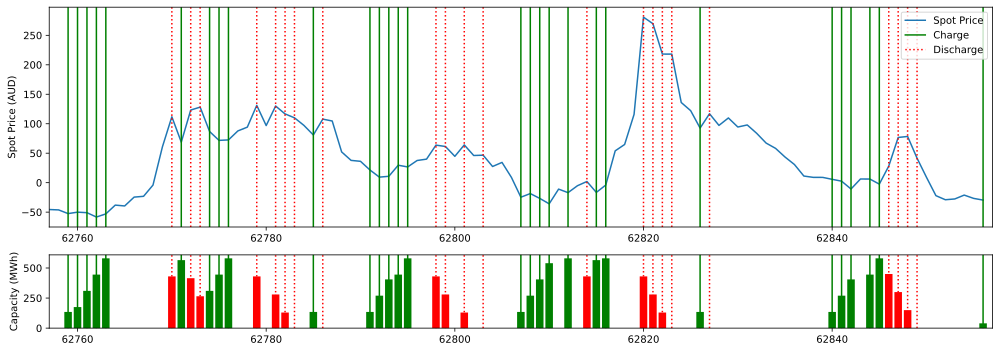

In [12]:
# Note: must convert opening capacity to closing capacity
closing_capacity = result.opening_capacity.shift(-1)
plot_actions(result.spot_price, result.power, closing_capacity=closing_capacity, start=-700, end=-600)